<a href="https://colab.research.google.com/github/jabsolo73/DAY1-ML/blob/main/binarytree.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#Import the libraries

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

In [2]:
#Import the dataset

data = pd.read_excel("/content/titanic.xlsx")

In [3]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [6]:
data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

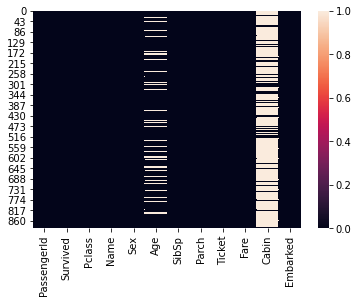

In [9]:
sns.heatmap(data.isnull())

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


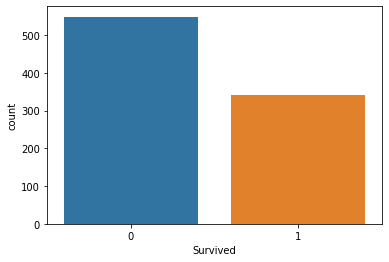

In [11]:
sns.countplot(data['Survived'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


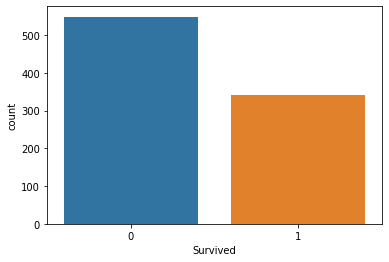

In [12]:
sns.countplot(data['Survived'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


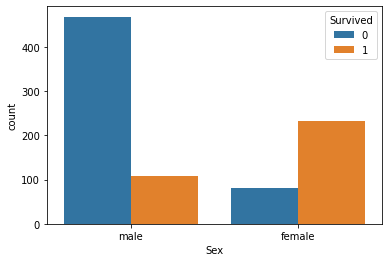

In [13]:
sns.countplot(data['Sex'], hue= data['Survived'])

In [14]:
#Filling the missing variables in age with  mean
data['Age'].fillna(data['Age'].mean(), inplace = True)

In [15]:
data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


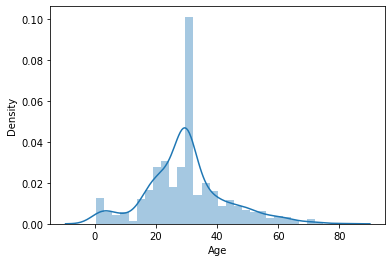

In [19]:
sns.distplot(data['Age'])

In [20]:
survived_age = data[data['Survived'] == 1]

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


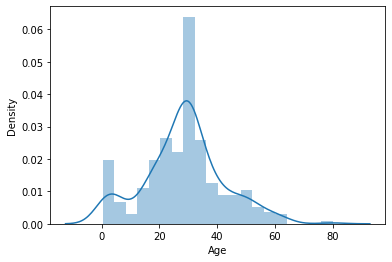

In [21]:
sns.distplot(survived_age['Age'])

In [26]:
data.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [27]:
data.drop(['PassengerId', 'Name', 'Ticket', 'Cabin'], axis = 1, inplace = True)

In [28]:
data.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    2
dtype: int64

In [29]:
data['Embarked'].fillna('S', inplace =True)

In [30]:
data.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

In [31]:
new_data = pd.get_dummies(data, drop_first= True)

In [32]:
new_data

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_male,Embarked_Q,Embarked_S
0,0,3,22.000000,1,0,7.2500,1,0,1
1,1,1,38.000000,1,0,71.2833,0,0,0
2,1,3,26.000000,0,0,7.9250,0,0,1
3,1,1,35.000000,1,0,53.1000,0,0,1
4,0,3,35.000000,0,0,8.0500,1,0,1
...,...,...,...,...,...,...,...,...,...
886,0,2,27.000000,0,0,13.0000,1,0,1
887,1,1,19.000000,0,0,30.0000,0,0,1
888,0,3,29.699118,1,2,23.4500,0,0,1
889,1,1,26.000000,0,0,30.0000,1,0,0


In [33]:
#Splitting data into dedpendent(y) and independednt (x)

x = new_data.drop('Survived', axis = 1)

y = new_data['Survived']

In [34]:

#SPlit the dataset into training and testing

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.30, random_state = 0)

In [35]:
#Build the decision trees classifier

from sklearn.tree import DecisionTreeClassifier

d_tree = DecisionTreeClassifier()
d_tree.fit(x_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [36]:
#Predict the training set

train_predict = d_tree.predict(x_train)

#Predict the test set results

test_predict = d_tree.predict(x_test)

In [37]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

print(accuracy_score(y_train, train_predict))

0.9791332263242376


In [38]:
print(accuracy_score(y_test, test_predict))

0.7873134328358209


In [39]:

#Print the deapth of the tree

d_tree.get_depth()

15

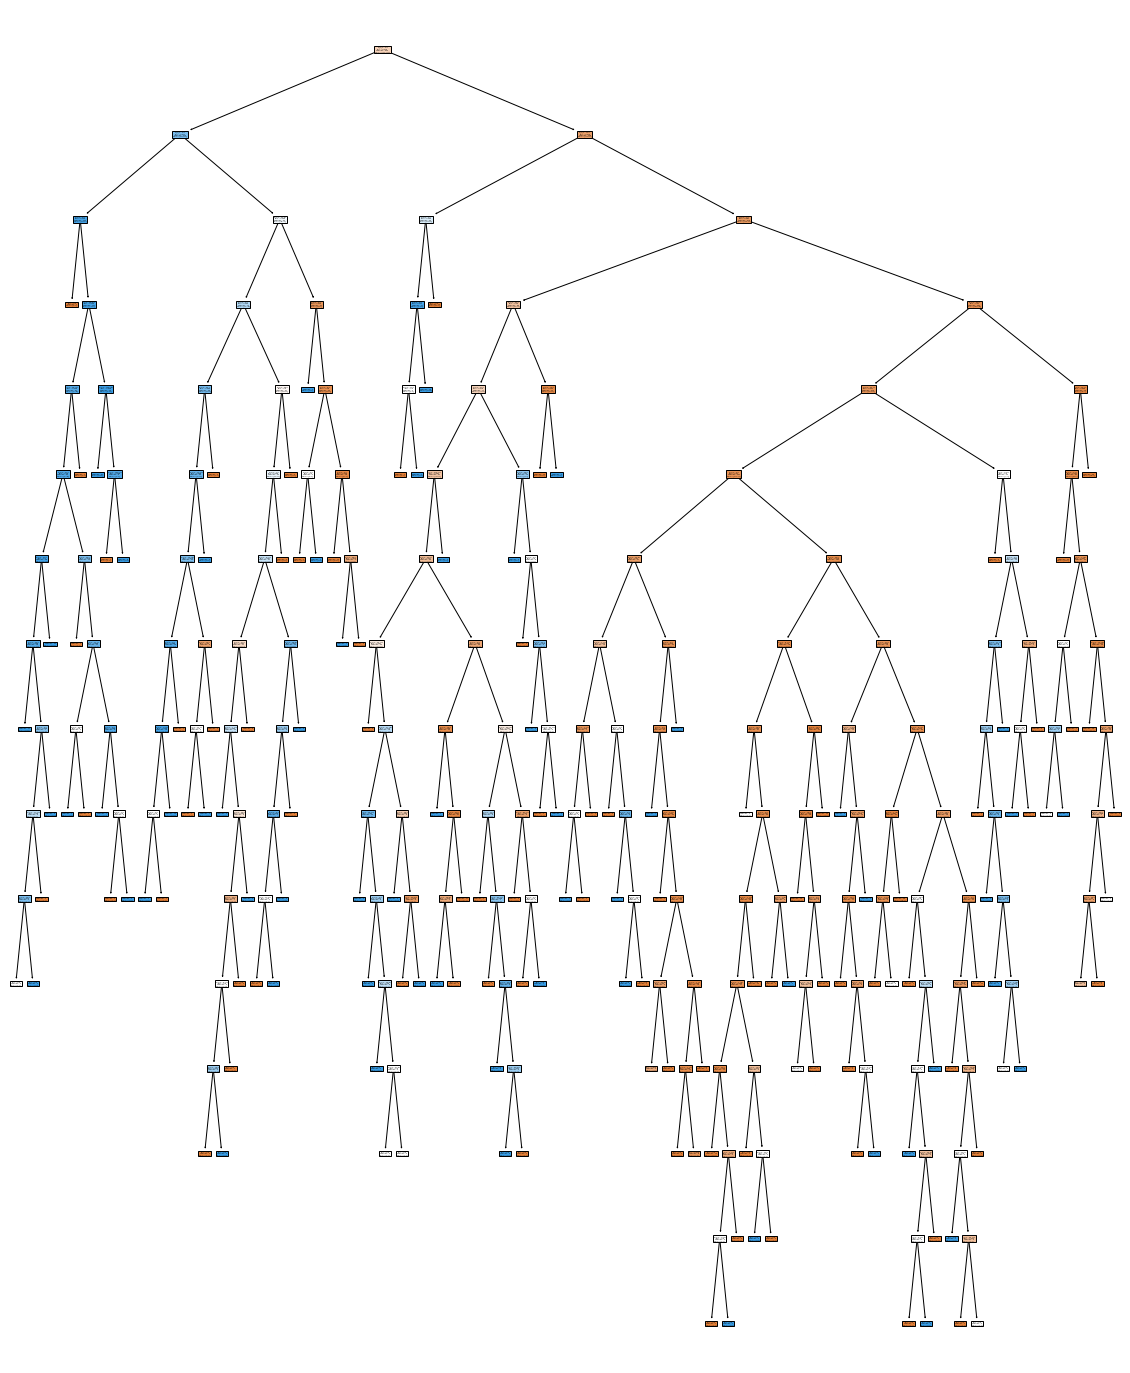

In [40]:
#Plot the decision tree in the form of tree structure

plt.figure(figsize= (20,25))
from sklearn.tree import plot_tree
plot_tree(d_tree, filled = True)
plt.savefig('decision_tree')
plt.show()

In [41]:
#Checking the feature importance

feature_importance = pd.DataFrame({'Features': x.columns, 'Importances': d_tree.feature_importances_})
print(feature_importance)

     Features  Importances
0      Pclass     0.113927
1         Age     0.216390
2       SibSp     0.080561
3       Parch     0.026801
4        Fare     0.221818
5    Sex_male     0.310921
6  Embarked_Q     0.007107
7  Embarked_S     0.022476


In [42]:
#Sort the importance dataframe in ascending order

feature_importance = feature_importance.sort_values(by = 'Importances')

print(feature_importance)

     Features  Importances
6  Embarked_Q     0.007107
7  Embarked_S     0.022476
3       Parch     0.026801
2       SibSp     0.080561
0      Pclass     0.113927
1         Age     0.216390
4        Fare     0.221818
5    Sex_male     0.310921
